<a href="https://colab.research.google.com/github/shivansh2310/Finance-Stuff/blob/main/Estimating_Risk_Factor_model_for_a_stock_with_live_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pandas_datareader
import matplotlib.pyplot as plt


In [2]:
pandas_datareader.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [3]:
start = '1926-01-01'

In [4]:
ff = pandas_datareader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors',freq='M', start=start).read()

In [5]:
ff

{0:          Mkt-RF   SMB   HML    RF
 Date                             
 1926-07    2.96 -2.56 -2.43  0.22
 1926-08    2.64 -1.17  3.82  0.25
 1926-09    0.36 -1.40  0.13  0.23
 1926-10   -3.24 -0.09  0.70  0.32
 1926-11    2.53 -0.10 -0.51  0.31
 ...         ...   ...   ...   ...
 2022-08   -3.77  1.39  0.31  0.19
 2022-09   -9.35 -0.82  0.03  0.19
 2022-10    7.83  0.10  8.05  0.23
 2022-11    4.60 -3.40  1.39  0.29
 2022-12   -6.41 -0.64  1.36  0.33
 
 [1158 rows x 4 columns], 1:       Mkt-RF    SMB    HML    RF
 Date                            
 1927   29.47  -2.04  -4.54  3.12
 1928   35.39   4.51  -6.17  3.56
 1929  -19.54 -30.70  11.67  4.75
 1930  -31.23  -5.17 -11.54  2.41
 1931  -45.11   3.70 -13.95  1.07
 ...      ...    ...    ...   ...
 2018   -6.95  -3.21  -9.73  1.83
 2019   28.28  -6.10 -10.34  2.15
 2020   23.66  13.17 -46.57  0.45
 2021   23.56  -3.92  25.57  0.04
 2022  -21.60  -6.79  25.85  1.43
 
 [96 rows x 4 columns], 'DESCR': 'F-F Research Data Factors\n-------

In [6]:
ff_df = ff[0]

In [7]:
ff_df

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.56,-2.43,0.22
1926-08,2.64,-1.17,3.82,0.25
1926-09,0.36,-1.40,0.13,0.23
1926-10,-3.24,-0.09,0.70,0.32
1926-11,2.53,-0.10,-0.51,0.31
...,...,...,...,...
2022-08,-3.77,1.39,0.31,0.19
2022-09,-9.35,-0.82,0.03,0.19
2022-10,7.83,0.10,8.05,0.23


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd57a9c55b0>,
      dtype=object)

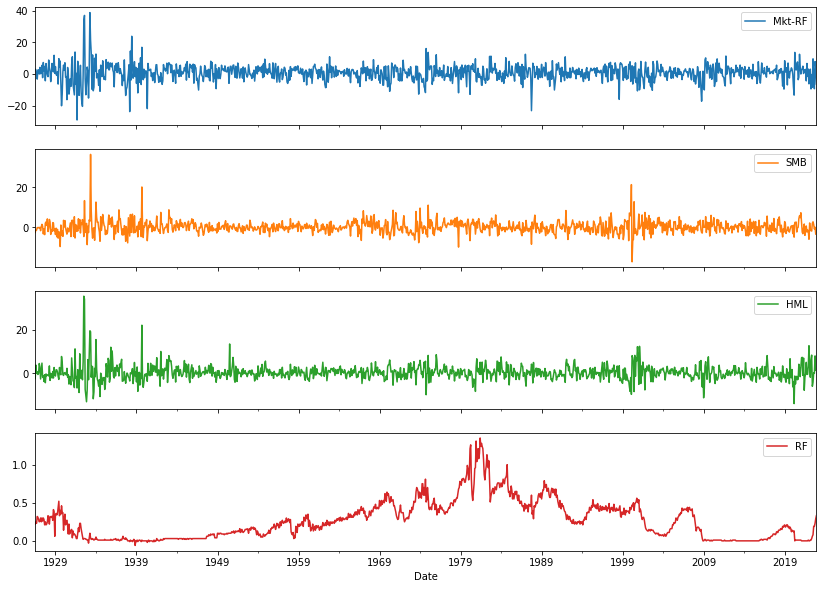

In [8]:
ff_df.plot(subplots=True, figsize=(14,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd57a4dce20>,
      dtype=object)

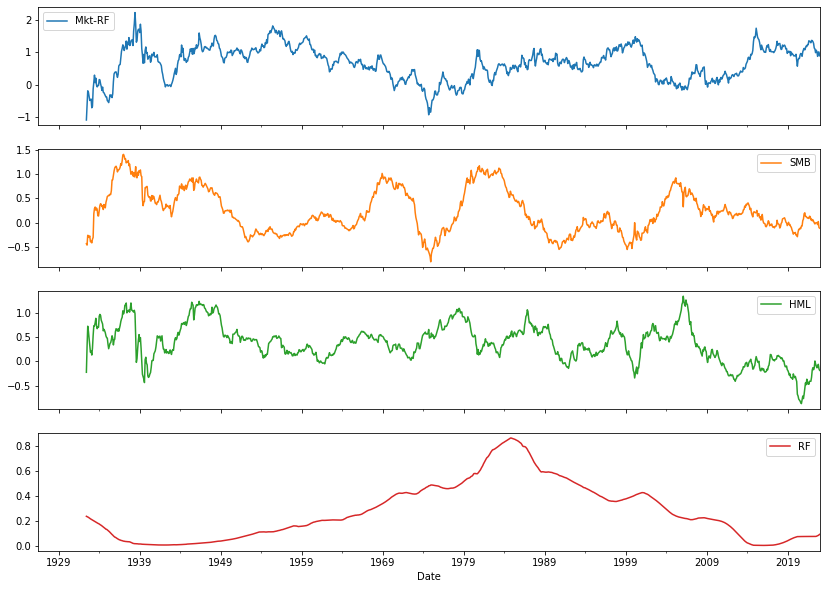

In [9]:
ff_df.rolling(72).mean().plot(subplots=True, figsize=(14,10))

In [10]:
ff_mom_df = pandas_datareader.famafrench.FamaFrenchReader('F-F_Momentum_Factor',freq='M', start=start).read()[0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd57a58a2b0>],
      dtype=object)

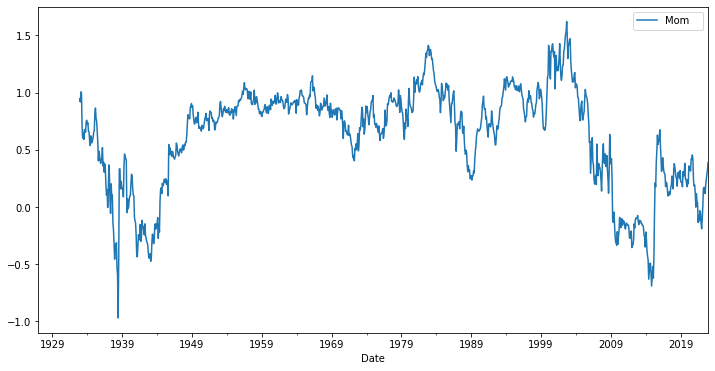

In [11]:
ff_mom_df.rolling(72).mean().plot(subplots=True, figsize=(12,6))

In [12]:

ffac_merged_df = pd.merge(ff_df,ff_mom_df,on='Date',how='inner',sort=True,copy=True,indicator=False,validate='one_to_one')

In [13]:
ffac_merged_df

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1927-01,-0.06,-0.37,4.54,0.25,0.36
1927-02,4.18,0.04,2.94,0.26,-2.14
1927-03,0.13,-1.65,-2.61,0.30,3.61
1927-04,0.46,0.30,0.81,0.25,4.30
1927-05,5.44,1.53,4.73,0.30,3.00
...,...,...,...,...,...
2022-08,-3.77,1.39,0.31,0.19,2.10
2022-09,-9.35,-0.82,0.03,0.19,3.48
2022-10,7.83,0.10,8.05,0.23,3.89


In [19]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#AAPL Stock Risk Factor Estimation


In [22]:
import yfinance as yf
yf.pdr_override()

In [25]:
AAPL_data = pandas_datareader.data.get_data_yahoo('AAPL',start=start)['Adj Close'].resample('M').ffill().pct_change()

[*********************100%***********************]  1 of 1 completed


In [26]:
AAPL_data

Date
1980-12-31         NaN
1981-01-31   -0.172163
1981-02-28   -0.061943
1981-03-31   -0.075475
1981-04-30    0.158162
                ...   
2022-10-31    0.109551
2022-11-30   -0.033027
2022-12-31   -0.122272
2023-01-31    0.110521
2023-02-28    0.027972
Freq: M, Name: Adj Close, Length: 507, dtype: float64

In [28]:
AAPL_df = AAPL_data.to_frame()

In [29]:
AAPL_df

,Adj Close
Date,
1980-12-31,NaN
1981-01-31,-0.172163
1981-02-28,-0.061943
1981-03-31,-0.075475
1981-04-30,0.158162
...,...
2022-10-31,0.109551
2022-11-30,-0.033027
2022-12-31,-0.122272


In [30]:
AAPL_df.index.dtype

dtype('<M8[ns]')

In [32]:
AAPL_df['str_date'] = AAPL_df.index.astype(str)
AAPL_df['dt_date'] = pd.to_datetime(AAPL_df['str_date']).dt.strftime('%Y-%m')

In [33]:
AAPL_df.dt_date.dtype

dtype('O')

In [34]:
ffac_merged_df['str_date'] = ffac_merged_df.index.astype(str)
ffac_merged_df['dt_date'] = pd.to_datetime(ffac_merged_df['str_date']).dt.strftime('%Y-%m')

In [35]:
ffac_merged_df.dt_date.dtype

dtype('O')

In [36]:
AAPL_ffac_merge_df = pd.merge(AAPL_df,ffac_merged_df,on='dt_date',how='inner',sort=True,copy=True,indicator=False,validate='one_to_one')

In [37]:
AAPL_ffac_merge_df

,Adj Close,str_date_x,dt_date,Mkt-RF,SMB,HML,RF,Mom,str_date_y
0,NaN,1980-12-31,1980-12,-4.52,-0.26,2.79,1.31,-6.68,1980-12
1,-0.172163,1981-01-31,1981-01,-5.04,2.92,6.72,1.04,-7.95,1981-01
2,-0.061943,1981-02-28,1981-02,0.57,-0.34,1.02,1.07,-1.35,1981-02
3,-0.075475,1981-03-31,1981-03,3.56,3.54,0.64,1.21,0.74,1981-03
4,0.158162,1981-04-30,1981-04,-2.11,4.40,2.28,1.08,-0.91,1981-04
...,...,...,...,...,...,...,...,...,...
500,-0.031208,2022-08-31,2022-08,-3.77,1.39,0.31,0.19,2.10,2022-08
501,-0.120977,2022-09-30,2022-09,-9.35,-0.82,0.03,0.19,3.48,2022-09
502,0.109551,2022-10-31,2022-10,7.83,0.10,8.05,0.23,3.89,2022-10
503,-0.033027,2022-11-30,2022-11,4.60,-3.40,1.39,0.29,-2.01,2022-11


In [38]:
AAPL_ffac_merge_df.drop(columns=['str_date_x', 'str_date_y'],inplace=True)

In [41]:
AAPL_ffac_merge_df.rename(columns={'Adj Close':'AAPL'},inplace=True)

In [43]:
AAPL_ffac_merge_df['AAPL_RF'] = AAPL_ffac_merge_df['AAPL']*100-AAPL_ffac_merge_df['RF']

In [46]:
AAPL_ffac_merge_df.dropna(axis=0,inplace=True)

In [59]:
AAPL_ffac_merge_df

,AAPL,dt_date,Mkt-RF,SMB,HML,RF,Mom,AAPL_RF
1,-0.172163,1981-01,-5.04,2.92,6.72,1.04,-7.95,-18.256279
2,-0.061943,1981-02,0.57,-0.34,1.02,1.07,-1.35,-7.264291
3,-0.075475,1981-03,3.56,3.54,0.64,1.21,0.74,-8.757521
4,0.158162,1981-04,-2.11,4.40,2.28,1.08,-0.91,14.736212
5,0.167399,1981-05,0.11,2.00,-0.42,1.15,3.70,15.589862
...,...,...,...,...,...,...,...,...
500,-0.031208,2022-08,-3.77,1.39,0.31,0.19,2.10,-3.310798
501,-0.120977,2022-09,-9.35,-0.82,0.03,0.19,3.48,-12.287705
502,0.109551,2022-10,7.83,0.10,8.05,0.23,3.89,10.725142
503,-0.033027,2022-11,4.60,-3.40,1.39,0.29,-2.01,-3.592749


In [61]:
list(AAPL_ffac_merge_df)

['AAPL', 'dt_date', 'Mkt-RF', 'SMB', 'HML', 'RF', 'Mom', 'AAPL_RF']

In [62]:
AAPL_ffac_merge_df.rename(columns={'Mom':'MOM'},inplace=True)

In [63]:
list(AAPL_ffac_merge_df)

['AAPL', 'dt_date', 'Mkt-RF', 'SMB', 'HML', 'RF', 'MOM', 'AAPL_RF']

In [64]:
from statsmodels.api import OLS
results = OLS(AAPL_ffac_merge_df['AAPL_RF'],AAPL_ffac_merge_df[['Mkt-RF','SMB','HML','MOM']],missing='drop').fit()

In [65]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                AAPL_RF   R-squared (uncentered):                   0.291
Model:                            OLS   Adj. R-squared (uncentered):              0.285
Method:                 Least Squares   F-statistic:                              51.21
Date:                Wed, 22 Feb 2023   Prob (F-statistic):                    3.89e-36
Time:                        17:25:42   Log-Likelihood:                         -1923.4
No. Observations:                 504   AIC:                                      3855.
Df Residuals:                     500   BIC:                                      3872.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         1.2736      0.115     11.091      0.000       1.048       1.499
SMB            0.2310      0.173      1.337      0.182      -0.108       0.570
HML           -0.8258      0.167     -4.936      0.000      -1.154      -0.497
MOM           -0.0498      0.117     -0.425      0.671      -0.280       0.181
==============================================================================
Omnibus:                       14.898   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               30.762
Skew:                          -0.056   Prob(JB):                     2.09e-07
Kurtosis:                       4.205   Cond. No.                         1.88
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
import statsmodels.tools
AAPL_ffac_merge_df_c = statsmodels.tools.add_constant(AAPL_ffac_merge_df,prepend=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [67]:
AAPL_ffac_merge_df_c

,const,AAPL,dt_date,Mkt-RF,SMB,HML,RF,MOM,AAPL_RF
1,1.0,-0.172163,1981-01,-5.04,2.92,6.72,1.04,-7.95,-18.256279
2,1.0,-0.061943,1981-02,0.57,-0.34,1.02,1.07,-1.35,-7.264291
3,1.0,-0.075475,1981-03,3.56,3.54,0.64,1.21,0.74,-8.757521
4,1.0,0.158162,1981-04,-2.11,4.40,2.28,1.08,-0.91,14.736212
5,1.0,0.167399,1981-05,0.11,2.00,-0.42,1.15,3.70,15.589862
...,...,...,...,...,...,...,...,...,...
500,1.0,-0.031208,2022-08,-3.77,1.39,0.31,0.19,2.10,-3.310798
501,1.0,-0.120977,2022-09,-9.35,-0.82,0.03,0.19,3.48,-12.287705
502,1.0,0.109551,2022-10,7.83,0.10,8.05,0.23,3.89,10.725142
503,1.0,-0.033027,2022-11,4.60,-3.40,1.39,0.29,-2.01,-3.592749


In [70]:
results = OLS(AAPL_ffac_merge_df_c['AAPL_RF'],AAPL_ffac_merge_df_c[['const','Mkt-RF','SMB','HML','MOM']],missing='drop').fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AAPL_RF   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     50.07
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           1.96e-35
Time:                        17:34:07   Log-Likelihood:                -1919.3
No. Observations:                 504   AIC:                             3849.
Df Residuals:                     499   BIC:                             3870.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4488      0.506      2.864      0.004       0.455       2.443
Mkt-RF         1.2070      0.116     10.373      0.000       0.978       1.436
SMB            0.2242      0.172      1.307      0.192      -0.113       0.561
HML           -0.9062      0.168     -5.379      0.000      -1.237      -0.575
MOM           -0.1128      0.118     -0.952      0.342      -0.346       0.120
==============================================================================
Omnibus:                       14.113   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               28.314
Skew:                          -0.054   Prob(JB):                     7.11e-07
Kurtosis:                       4.156   Cond. No.                         5.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""